## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from td.client import TDClient
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV,\
    cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from code.functions import *
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('data/cmc.data', names = ['age','edu','hus_edu','chil','rel','work',
                                        'hus_ocu','sol','media','cmc'])

In [4]:
df.cmc.value_counts()

1    629
3    511
2    333
Name: cmc, dtype: int64

# EDA

In [5]:
X = df.copy()
y = X.pop('cmc')

In [6]:
def feature_plot(df, ind, dep, plot_type, xlabel, xlog = 'n', ylog = 'n', color = u'#1f77b4'):
    ylabel = f'Contraception Method'
    title = f'{ylabel} vs {xlabel}'
    file_name = f'{xlabel}.png'
    fig, ax = plt.subplots(figsize = [12,8])
    if plot_type == 'scatter':
        sns_obj = sns.scatterplot(data = df, x=ind, y=dep, ax=ax, color = color)
    elif plot_type == 'line':
        sns_obj = sns.lineplot(data = df, x=ind, y=dep, color = color)
    if xlog == 'y':
        set_x_log(sns_obj, ax)
    if ylog == 'y':
        set_y_log(sns_obj, ax)
    # what color is u'#1f77b4'? what color is None?
    ax.set_title(title, fontdict = {'fontsize': 14})
    ax.set_xlabel(xlabel, fontdict = {'fontsize': 12})
    ax.set_ylabel(ylabel, fontdict = {'fontsize': 12})
    plt.savefig(f'images/{file_name}')

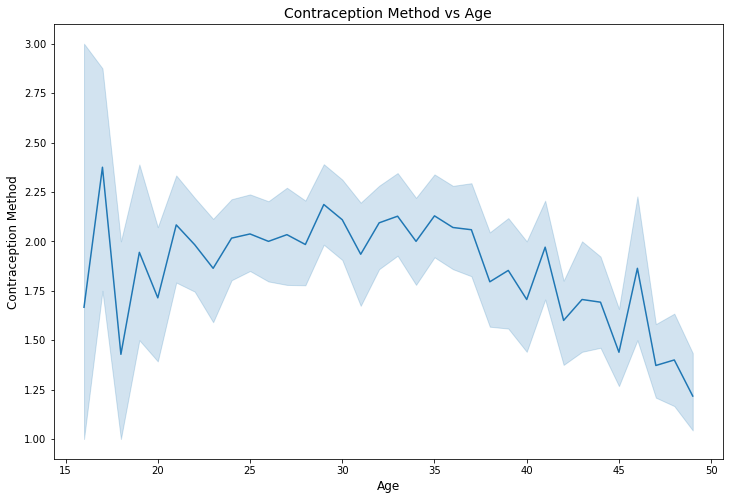

In [7]:
feature_plot(df, df.age, y, 'line', 'Age', xlog = 'n', ylog = 'n', color = u'#1f77b4')

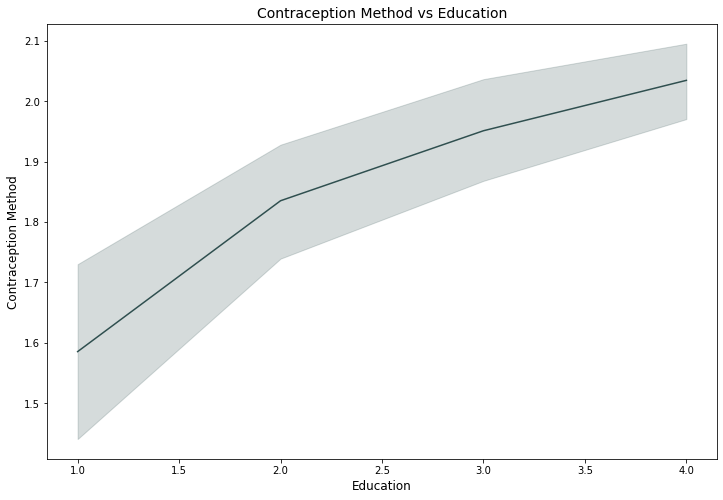

In [8]:
feature_plot(df, df.edu, y, 'line', 'Education', color = 'darkslategray')

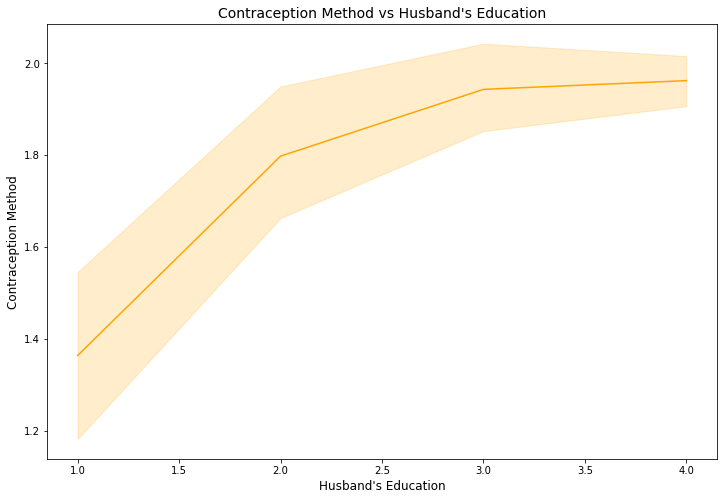

In [9]:
feature_plot(df, df.hus_edu, y, 'line', 'Husband\'s Education', color = 'orange')

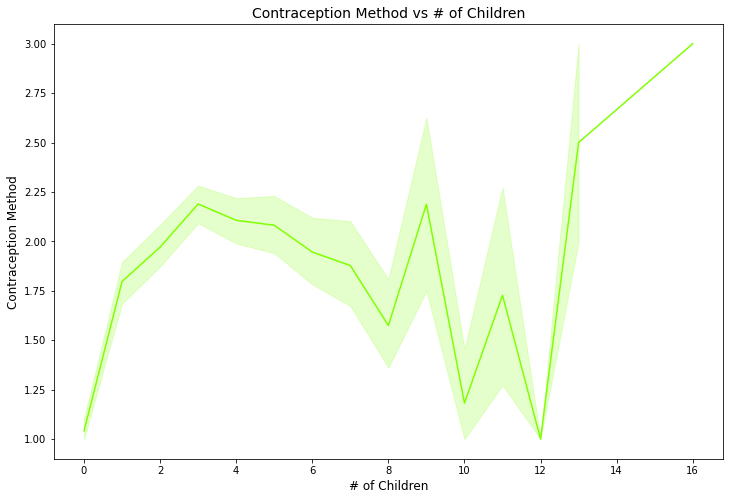

In [10]:
feature_plot(df, df.chil, y, 'line', '# of Children', color = 'chartreuse')

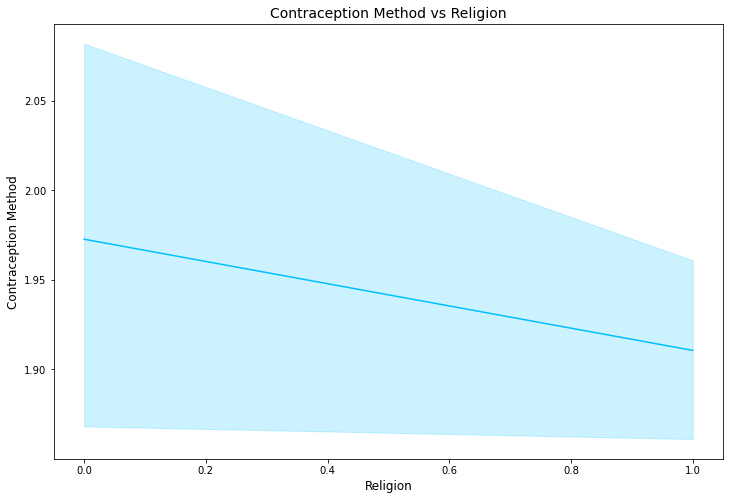

In [11]:
feature_plot(df, df.rel, y, 'line', 'Religion', color = 'deepskyblue')

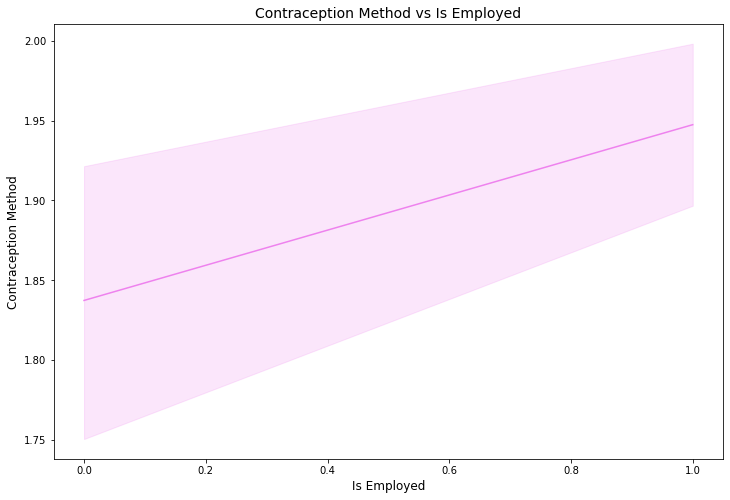

In [12]:
feature_plot(df, df.work, y, 'line', 'Is Employed', color = 'violet')

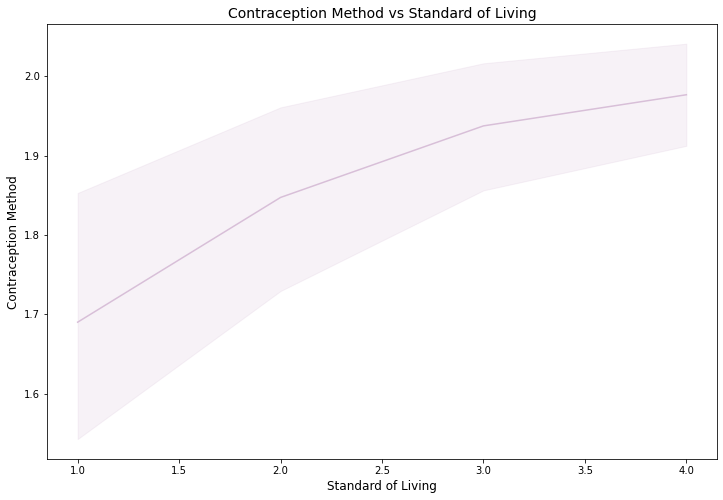

In [13]:
feature_plot(df, df.sol, y, 'line', 'Standard of Living', color = 'thistle')

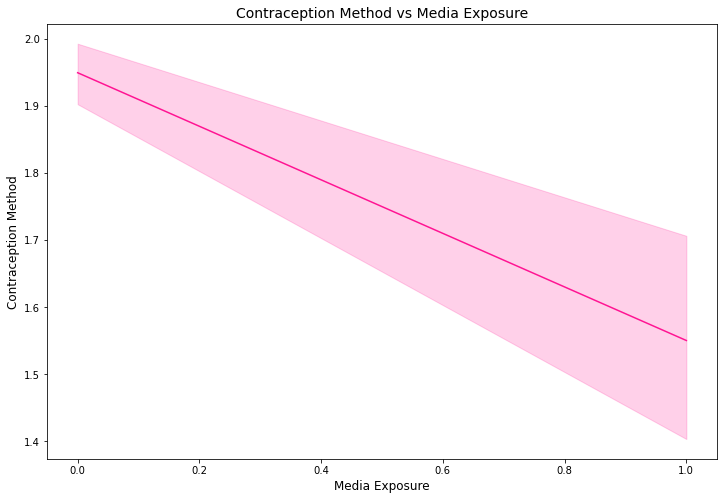

In [14]:
feature_plot(df, df.media, y, 'line', 'Media Exposure', color = 'deeppink')

# Data Preparation

## Dummying

In [9]:
to_dummy = ['edu', 'hus_edu', 'chil', 'hus_ocu', 'sol']
X_with_dums = pd.get_dummies(X, columns=to_dummy, drop_first=True)
# X_with_dums = pd.get_dummies(df, columns=to_dummy)
X_with_dums.shape

(1473, 30)

## Split data into train and test sets

In [10]:
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_with_dums, y, test_size=.25,
    random_state=1)
X_train_df.shape

(1104, 30)

## Scale features

In [11]:
rs = RobustScaler()

rs.fit(X_train_df)
X_train = rs.transform(X_train_df)
X_test = rs.transform(X_test_df)

# Modeling

## Logistic Regression - Base Model

Classifier:  LogisticRegression
Num features:  30
Model score:  0.5718157181571816
Accuracy score:  0.5718157181571816
Model F1 (micro):  0.5718157181571816
Model F1 (macro):  0.5405777690559126
Model F1 (weighted):  0.5660858901627333
Cross validation score:  [0.60810811 0.52702703 0.58108108 0.48648649 0.52054795]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.69      0.68       161
           2       0.59      0.33      0.43        87
           3       0.46      0.59      0.52       121

    accuracy                           0.57       369
   macro avg       0.57      0.54      0.54       369
weighted avg       0.58      0.57      0.57       369

One-vs-One ROC AUC scores:
0.753431 (macro),
0.756977 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.758908 (macro),
0.760028 (weighted by prevalence)


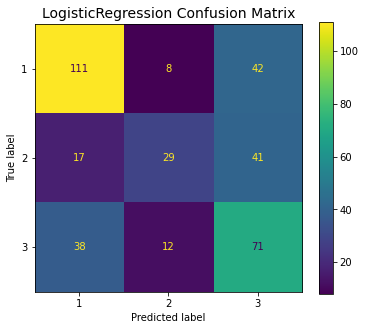

In [10]:
lr_base_clf = LogisticRegression(multi_class='multinomial', max_iter=1000)
lr_base_clf.fit(X_train, y_train)
model_stats(X_train_df.columns, lr_base_clf, 'LogisticRegression', X_test, y_test)

## Logistic Regression w/ Children dummied

{'lr__C': 78.47599703514607, 'lr__class_weight': 'balanced', 'lr__dual': True, 'lr__l1_ratio': 0.0001, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Classifier:  LogisticRegression
Num features:  30
Model score:  0.5501355013550135
Accuracy score:  0.5501355013550135
Model F1 (micro):  0.5501355013550135
Model F1 (macro):  0.5352941467738181
Model F1 (weighted):  0.5494776055323054
Cross validation score:  [0.43243243 0.5        0.55405405 0.54054054 0.45205479]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.59      0.63       149
           2       0.51      0.39      0.44        93
           3       0.47      0.62      0.54       127

    accuracy                           0.55       369
   macro avg       0.55      0.53      0.54       369
weighted avg       0.56      0.55      0.55       369

One-vs-One ROC AUC scores:
0.753592 (macro),
0.756264 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.757842 (macro),
0.

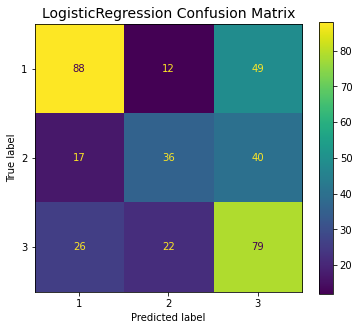

In [11]:
to_dummy = ['edu', 'hus_edu', 'chil', 'hus_ocu', 'sol']
X_dums, X_train, X_test, y_train, y_test = dummy_transform_scale(X, y, to_dummy, rs = 729)

# set up pipeline
pipe_lr = Pipeline([('lr' , LogisticRegression(random_state=1, max_iter=200))])

params_grid_lr = {'lr__penalty' : ['l2','elasticnet'],
                  'lr__class_weight' : ['balanced'],
                  'lr__dual' : [True],
                  'lr__solver' : ['liblinear'],
                  'lr__C' : np.logspace(-4, 4, 20),
                  'lr__l1_ratio' : np.logspace(-4, 4, 20) # only needed for elasticnet
                 }

lr_clf = GridSearchCV(pipe_lr, param_grid = params_grid_lr, cv = 5, verbose=0, n_jobs=-1)

# fit on data
lr_clf.fit(X_train, y_train)
print(lr_clf.best_params_)
best_lr_clf = lr_clf.best_estimator_
model_stats(X_train_df.columns, best_lr_clf, 'LogisticRegression', X_test, y_test)

In [12]:
lr_clf_ = best_lr_clf.named_steps['lr']
coef_df = pd.DataFrame(lr_clf_.coef_, columns = X_with_dums.columns, index = [1,2,3])
coef_df

,age,rel,work,media,edu_2,edu_3,edu_4,hus_edu_2,hus_edu_3,hus_edu_4,chil_1,chil_2,chil_3,chil_4,chil_5,chil_6,chil_7,chil_8,chil_9,chil_10,chil_11,chil_12,chil_13,chil_16,hus_ocu_2,hus_ocu_3,hus_ocu_4,sol_2,sol_3,sol_4
1,1.192963,0.386439,-0.015671,0.836849,-0.264326,-0.811980,-1.563201,-0.517918,-0.502869,-0.343674,-3.049579,-4.120991,-4.937231,-5.182418,-5.307722,-5.400066,-5.429150,-4.622743,-5.970930,-3.400371,-5.385245,0.497486,-8.227727,-6.842369,0.311394,0.129267,-0.402819,-0.492769,-0.458654,-0.809895
2,-0.174025,-0.049188,0.082224,-0.670869,0.996179,1.535074,2.384683,-1.367942,-1.556864,-1.442816,3.067694,3.610249,3.914823,4.152293,4.301790,4.211853,5.198670,3.929521,3.799628,3.339665,3.304046,-0.335021,5.381559,-0.762801,-0.619008,-0.496934,-0.112311,0.184218,0.546370,0.886796
3,-1.425312,-0.030851,-0.099718,-0.417269,-0.186614,0.056073,0.165654,2.283291,1.856342,1.940207,2.345069,3.263409,3.841421,3.932285,4.291663,3.903763,3.135373,3.808292,5.023249,-1.172613,4.626520,-0.887507,5.320474,7.885285,0.153143,0.404961,0.742477,0.475456,0.418338,0.333350


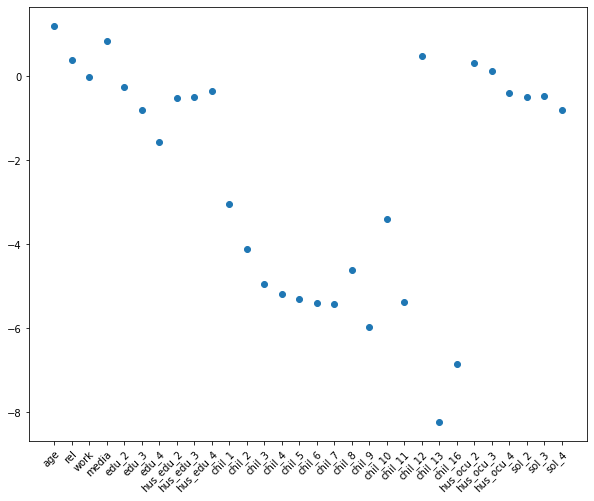

In [24]:
fig, ax = plt.subplots(figsize = [10,8])
ax.plot(coef_df.loc[1], 'o')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor");

## Logistic Regression w/o Children dummied

{'lr__C': 4.281332398719396, 'lr__class_weight': 'balanced', 'lr__dual': True, 'lr__l1_ratio': 0.0001, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Classifier:  LogisticRegression
Num features:  17
Model score:  0.5420054200542005
Accuracy score:  0.5420054200542005
Model F1 (micro):  0.5420054200542005
Model F1 (macro):  0.5377689957700215
Model F1 (weighted):  0.542374234515247
Cross validation score:  [0.47297297 0.44594595 0.45945946 0.45945946 0.52054795]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.59      0.60       149
           2       0.51      0.55      0.53        93
           3       0.49      0.48      0.48       127

    accuracy                           0.54       369
   macro avg       0.54      0.54      0.54       369
weighted avg       0.54      0.54      0.54       369

One-vs-One ROC AUC scores:
0.713027 (macro),
0.712080 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.712651 (macro),
0.7

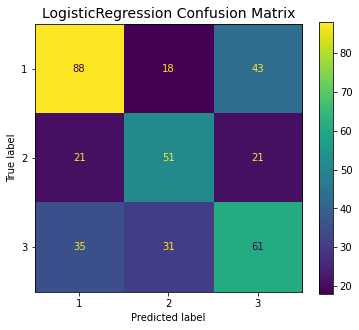

In [25]:
to_dummy = ['edu', 'hus_edu', 'hus_ocu', 'sol']
X_dums, X_train, X_test, y_train, y_test = dummy_transform_scale(X, y, to_dummy, rs = 729)
# set up pipeline
pipe_lr = Pipeline([('lr' , LogisticRegression(random_state=729, max_iter=200))])

params_grid_lr = {#'lr' : [LogisticRegression()],
                  'lr__penalty' : ['l2'],
                  'lr__class_weight' : ['balanced'],
                  'lr__dual' : [True],
                  'lr__solver' : ['liblinear'],
                  'lr__C' : np.logspace(-4, 4, 20),
                  'lr__l1_ratio' : np.logspace(-4, 4, 20)
                 }

lr_clf = GridSearchCV(pipe_lr, param_grid = params_grid_lr, cv = 5, verbose=0, n_jobs=-1)

# fit on data
lr_clf.fit(X_train, y_train)
print(lr_clf.best_params_)
best_lr_nochil_clf = lr_clf.best_estimator_
model_stats(X_dums.columns, best_lr_nochil_clf, 'LogisticRegression', X_test, y_test)

## LogisticRegression w/ Children capped at 12, dummied

Classifier:  LogisticRegression
Num features:  28
Model score:  0.5745257452574526
Accuracy score:  0.5745257452574526
Model F1 (micro):  0.5745257452574526
Model F1 (macro):  0.5660260551248922
Model F1 (weighted):  0.5763221448428955
Cross validation score:  [0.44594595 0.47297297 0.54054054 0.55405405 0.43835616]
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.63      0.65       149
           2       0.49      0.53      0.51        93
           3       0.53      0.54      0.53       127

    accuracy                           0.57       369
   macro avg       0.57      0.57      0.57       369
weighted avg       0.58      0.57      0.58       369

One-vs-One ROC AUC scores:
0.749358 (macro),
0.751516 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.752777 (macro),
0.753711 (weighted by prevalence)


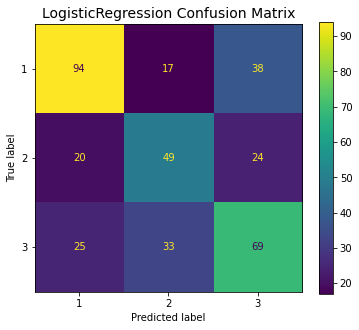

In [26]:
df_chil_cap = X.copy()
df_chil_cap['chil'] = np.where(df_chil_cap.chil > 11, 12, df_chil_cap.chil)
to_dummy = ['edu', 'hus_edu', 'chil', 'hus_ocu', 'sol']
X_dums, X_train, X_test, y_train, y_test = dummy_transform_scale(df_chil_cap, y, to_dummy, rs = 729)
lr_chil_cap_dum = LogisticRegression(random_state=729, max_iter=200,
                                     C = 4.281332398719396,
                                     class_weight = 'balanced',
                                     dual = True,
                                     l1_ratio = 0.0001,
                                     penalty = 'l2',
                                     solver = 'liblinear')
lr_chil_cap_dum.fit(X_train, y_train)
model_stats(X_dums.columns, lr_chil_cap_dum, 'LogisticRegression', X_test, y_test)

## LogisticRegression w/ Children capped at 12, not dummied

Classifier:  LogisticRegression
Num features:  17
Model score:  0.5420054200542005
Accuracy score:  0.5420054200542005
Model F1 (micro):  0.5420054200542005
Model F1 (macro):  0.5377689957700215
Model F1 (weighted):  0.542374234515247
Cross validation score:  [0.47297297 0.44594595 0.45945946 0.45945946 0.52054795]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.59      0.60       149
           2       0.51      0.55      0.53        93
           3       0.49      0.48      0.48       127

    accuracy                           0.54       369
   macro avg       0.54      0.54      0.54       369
weighted avg       0.54      0.54      0.54       369

One-vs-One ROC AUC scores:
0.713336 (macro),
0.712374 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.712934 (macro),
0.708726 (weighted by prevalence)


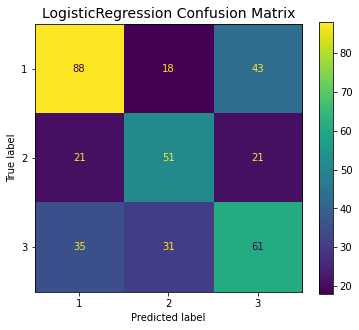

In [27]:
to_dummy = ['edu', 'hus_edu', 'hus_ocu', 'sol']
X_dums, X_train, X_test, y_train, y_test = dummy_transform_scale(df_chil_cap, y, to_dummy, rs = 729)
lr_chil_cap_nodum = LogisticRegression(random_state=729, max_iter=200,
                                     C = 4.281332398719396,
                                     class_weight = 'balanced',
                                     dual = True,
                                     l1_ratio = 0.0001,
                                     penalty = 'l2',
                                     solver = 'liblinear')
lr_chil_cap_nodum.fit(X_train, y_train)
model_stats(X_dums.columns, lr_chil_cap_nodum, 'LogisticRegression', X_test, y_test)

## LogisticRegression GridSearchCV

{'lr__C': 78.47599703514607, 'lr__class_weight': 'balanced', 'lr__dual': True, 'lr__l1_ratio': 0.0001, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Classifier:  LogisticRegression
Num features:  30
Model score:  0.5392953929539296
Accuracy score:  0.5392953929539296
Model F1 (micro):  0.5392953929539296
Model F1 (macro):  0.5345332577475435
Model F1 (weighted):  0.5396176311536358
Cross validation score:  [0.45945946 0.44594595 0.5        0.45945946 0.52054795]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.59      0.60       149
           2       0.51      0.54      0.52        93
           3       0.49      0.48      0.48       127

    accuracy                           0.54       369
   macro avg       0.53      0.54      0.53       369
weighted avg       0.54      0.54      0.54       369

One-vs-One ROC AUC scores:
0.712219 (macro),
0.711275 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.711875 (macro),
0.

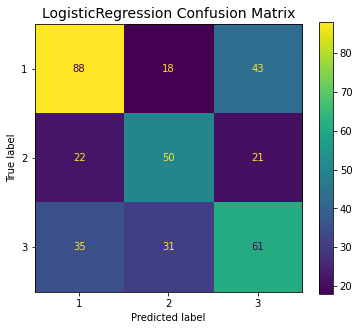

In [30]:
# set up pipeline
pipe_lr = Pipeline([('lr' , LogisticRegression(random_state=729, max_iter = 500))])

params_grid_lr = {# 'lr' : [LogisticRegression()],
                  'lr__penalty' : ['l1', 'l2', 'elasticnet'],
                  'lr__class_weight' : ['balanced', 'none'],
                  'lr__dual' : [True, False],
                  'lr__solver' : ['lbfgs', 'liblinear'],
                  'lr__C' : np.logspace(-4, 4, 20),
                  'lr__l1_ratio' : np.logspace(-4, 4, 20)
                 }
lr_clf = GridSearchCV(pipe_lr, param_grid = params_grid_lr, cv = 5, verbose=0, n_jobs=-1)

# fit on data
lr_clf.fit(X_train, y_train)
print(lr_clf.best_params_)
best_lr_clf = lr_clf.best_estimator_
model_stats(X_train_df.columns, best_lr_clf, 'LogisticRegression', X_test, y_test)

## KNN using Pipeline

In [32]:
X = df.copy()
y = X.pop('cmc')

cat_columns = ['edu', 'hus_edu', 'chil', 'hus_ocu', 'sol']
for col in cat_columns:
    X[col] = X[col].astype(object)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=729)

In [38]:
# train set
X_train_nums = X_train.select_dtypes('int64')

rs = RobustScaler()
# ss = StandardScaler()

rs.fit(X_train_nums)
nums_df = pd.DataFrame(rs.transform(X_train_nums),
                      index=X_train_nums.index)

X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

numerical_pipeline = Pipeline(steps=[
    ('rs', RobustScaler())
#     ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder( #drop='first',
                         sparse=False,
                         handle_unknown='ignore'))
])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

{'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
Classifier:  KNeighborsClassifier
Num features:  30
Model score:  0.5047489823609227
Accuracy score:  0.5047489823609227
Model F1 (micro):  0.5047489823609227
Model F1 (macro):  0.48531623594072687
Model F1 (weighted):  0.504216029489638
Cross validation score:  [0.44594595 0.50675676 0.45578231 0.46258503 0.46938776]
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.60      0.60       317
           2       0.43      0.39      0.41       167
           3       0.44      0.46      0.45       253

    accuracy                           0.50       737
   macro avg       0.49      0.48      0.49       737
weighted avg       0.50      0.50      0.50       737

One-vs-One ROC AUC scores:
0.680266 (macro),
0.681718 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.681630 (macro),
0.682940 (weighted by prevalence)


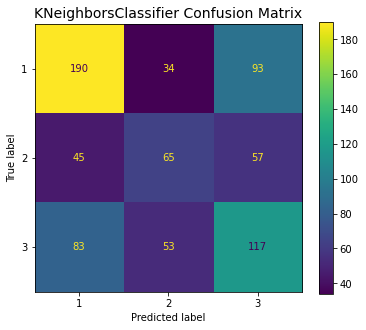

In [39]:
model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('knn', KNeighborsClassifier())
])

params_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9],
             'knn__p': [1, 2, 3],
             'knn__weights' : ['uniform', 'distance'],
             'knn__metric' : ['euclidean', 'manhattan', 'minkowski']
            }

knn_clf = GridSearchCV(model_pipe, param_grid = params_grid_knn,
                       cv = 3, verbose=0, n_jobs=-1)
knn_clf.fit(X_train, y_train)
print(knn_clf.best_params_)
best_knn_clf = knn_clf.best_estimator_
model_stats(X_train_df.columns, best_knn_clf, 'KNeighborsClassifier', X_test, y_test)

## SVM with PCA

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'pca__n_components': 5, 'svm__class_weight': 'balanced', 'svm__kernel': 'rbf'}
Classifier:  SVM
Num features:  30
Model score:  0.4816824966078697
Accuracy score:  0.4816824966078697
Model F1 (micro):  0.4816824966078697
Model F1 (macro):  0.4803294623520013
Model F1 (weighted):  0.48595033962944284
Cross validation score:  [0.50675676 0.51351351 0.49659864 0.50340136 0.52380952]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.43      0.51       317
           2       0.35      0.63      0.45       167
           3       0.53      0.45      0.48       253

    accuracy                           0.48       737
   macro avg       0.50      0.50      0.48       737
weighted avg       0.52      0.48      0.49       737

One-vs-One ROC AUC scores:
0.679641 (macro),
0.680223 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.681424 (macro),
0.680301 (weighted by pre

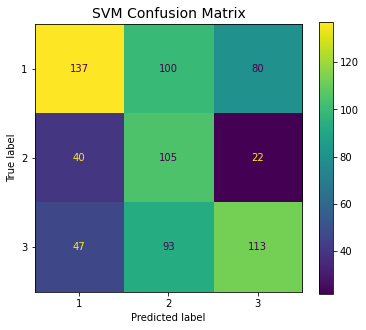

In [42]:
pipe_svm = Pipeline([
                     ('scl', RobustScaler()),
                     ('pca', PCA()),
                     ('svm', SVC(random_state=42, probability=True))])

params_grid_svm = {'svm__class_weight' : ['balanced', 'none'],
                   'svm__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                   'pca__n_components': [0, 2, 5, 10, 15, 20, 30, 45, 64],
                 }

svm_clf = GridSearchCV(pipe_svm, param_grid = params_grid_svm,
                       cv = 5, verbose=1, n_jobs=-1)
svm_clf.fit(X_train, y_train)
print(svm_clf.best_params_)
best_svm_clf = svm_clf.best_estimator_
model_stats(X_train_df.columns, best_svm_clf, 'SVM', X_test, y_test)

## RandomForestClassifier GridSearchCV

{'rfc__max_depth': 6, 'rfc__max_features': 'auto', 'rfc__n_estimators': 70}
Classifier:  RandomForestClassifier
Num features:  30
Model score:  0.5481682496607869
Accuracy score:  0.5481682496607869
Model F1 (micro):  0.5481682496607869
Model F1 (macro):  0.529555783257609
Model F1 (weighted):  0.5475573679419886
Cross validation score:  [0.53378378 0.52702703 0.47619048 0.57823129 0.55102041]
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.59      0.62       317
           2       0.51      0.39      0.44       167
           3       0.47      0.60      0.53       253

    accuracy                           0.55       737
   macro avg       0.54      0.53      0.53       737
weighted avg       0.56      0.55      0.55       737

One-vs-One ROC AUC scores:
0.728626 (macro),
0.731300 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.732433 (macro),
0.733626 (weighted by prevalence)


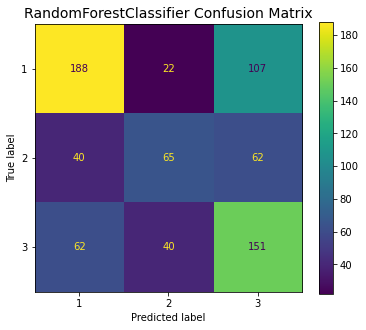

In [43]:
pipe_rfc = Pipeline([('rfc' , RandomForestClassifier())])

params_grid_rfc = {#'rfc' : [RandomForestClassifier()],
                   'rfc__n_estimators' : list(range(10,101,10)),
                   'rfc__max_features': ['auto', 'sqrt', 'log2'],
                   'rfc__max_depth' : list(range(1,10))
                  }

rfc_clf = GridSearchCV(pipe_rfc, param_grid = params_grid_rfc, cv = 5, verbose=0, n_jobs=-1)

rfc_clf.fit(X_train, y_train)
print(rfc_clf.best_params_)
best_rfc_clf = rfc_clf.best_estimator_
model_stats(X_train_df.columns, best_rfc_clf, 'RandomForestClassifier', X_test, y_test)

## LogisticRegression GridSearchCV with Tomek Links resampling

In [44]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train.ravel())
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 262, 3: 205, 2: 166})


{'lr__C': 0.012742749857031334, 'lr__class_weight': 'balanced', 'lr__dual': False, 'lr__l1_ratio': 0.0001, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Classifier:  LogisticRegression
Num features:  30
Model score:  0.5020352781546812
Accuracy score:  0.5020352781546812
Model F1 (micro):  0.5020352781546812
Model F1 (macro):  0.5005447853962893
Model F1 (weighted):  0.5064462427548014
Cross validation score:  [0.48648649 0.51351351 0.57142857 0.5170068  0.52380952]
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.43      0.53       317
           2       0.39      0.60      0.47       167
           3       0.47      0.52      0.49       253

    accuracy                           0.50       737
   macro avg       0.52      0.52      0.50       737
weighted avg       0.55      0.50      0.51       737

One-vs-One ROC AUC scores:
0.693472 (macro),
0.692067 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.691718 (macro),
0.

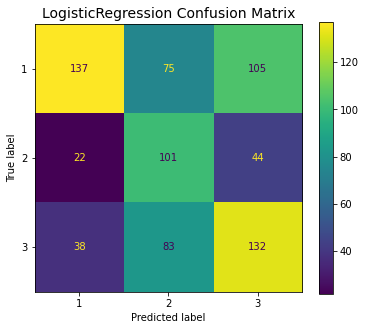

In [45]:
# Create grid search object
lr_tl_clf = GridSearchCV(pipe_lr, param_grid = params_grid_lr, cv = 5, verbose=0, n_jobs=-1)

# Fit on data
lr_tl_clf.fit(X_res, y_res)
print(lr_tl_clf.best_params_)
best_lr_tl_clf = lr_tl_clf.best_estimator_
model_stats(X_train_df.columns, best_lr_tl_clf, 'LogisticRegression', X_test, y_test)

## RandomForestClassifier GridSearchCV with Tomek Links resampling

In [ ]:
# Create grid search object
rfc_tl_clf = GridSearchCV(pipe_rfc, param_grid = params_grid_rfc, cv = 5, verbose=0, n_jobs=-1)

# Fit on data
rfc_tl_clf.fit(X_res, y_res)
print(rfc_tl_clf.best_params_)
best_rfc_tl_clf = rfc_tl_clf.best_estimator_
model_stats(X_train_df.columns, best_rfc_tl_clf, 'RandomForestClassifier', X_test, y_test)

## XGBoost with GridSearchCV

In [ ]:
xgb = XGBClassifier(random_state=729, learning_rate = 0.2, eval_metric = 'auc')
xgb.fit(X_train, y_train)
model_stats(X_train_df.columns, xgb, 'XGBClassifier', X_test, y_test)

In [ ]:
pipe_xgb = Pipeline([('xgb', XGBClassifier(random_state=729, learning_rate = 0.2, eval_metric = 'auc'))])
params_grid_xgb = {'xgb__nthread': [4],  # not a stat
                   'xgb__booster' : ['gbtree', 'gblinear', 'dart'],
                   'xgb__colsample_bylevel': [0.5, 0.75],
                   'xgb__colsample_bynode': [0.5, 0.75],
                   'xgb__colsample_bytree': [0.5, 0.75],
                   #'xgb__learning_rate': np.linspace(0.1, 0.2, 6), # does not need
                   'xgb__max_depth': [8, 10],
                   'xgb__min_child_weight': [7, 9],
                   'xgb__missing': [-999],
                   'xgb__n_estimators': [250],
                   #'xgb__objective': ['reg:squarederror'],
                   'xgb__subsample': [0.2, 0.5, 0.7]
                  }
xgb_clf = GridSearchCV(pipe_xgb, params_grid_xgb, n_jobs=-1,
                  cv=StratifiedKFold(n_splits=3, shuffle=True), 
                  scoring='f1_weighted',
                  verbose=2, refit=True)
xgb_clf.fit(X_train, y_train)
print(xgb_clf.best_params_)
best_xgb_clf = xgb_clf.best_estimator_
model_stats(X_train_df.columns, best_xgb_clf, 'XGBClassifier', X_test, y_test)

In [ ]:
pipe_xgb = Pipeline([('xgb', XGBClassifier(random_state=729, learning_rate = 0.3, eval_metric = 'auc'))])
params_grid_xgb = {'xgb__nthread': [4],  # not a stat
                   'xgb__booster' : ['gbtree', 'gblinear', 'dart'],
                   'xgb__colsample_bylevel': [0.25, 0.4, 0.5],
                   'xgb__colsample_bynode': [0.25, 0.4, 0.75],
                   'xgb__colsample_bytree': [0.25, 0.4, 0.75],
                   #'xgb__learning_rate': np.linspace(0.1, 0.2, 6), # does not need
                   'xgb__max_depth': [6, 7, 8], # 7,8,10
                   'xgb__min_child_weight': [5, 6, 7], # 5,6,7,9
                   'xgb__missing': [-999],
                   'xgb__n_estimators': [250],
                   #'xgb__objective': ['reg:squarederror'],
                   'xgb__subsample': [0.1, 0.15, 0.2] # 0.15, 0.2, 0.5, 0.7
                  }
xgb_clf = GridSearchCV(pipe_xgb, params_grid_xgb, n_jobs=-1,
                  cv=StratifiedKFold(n_splits=3, shuffle=True), 
                  scoring='f1_weighted',
                  verbose=2, refit=True)
xgb_clf.fit(X_train, y_train)
print(xgb_clf.best_params_)
best_xgb_clf = xgb_clf.best_estimator_
model_stats(X_train_df.columns, best_xgb_clf, 'XGBClassifier', X_test, y_test)

## XGBoost Random Forest Classifer

In [ ]:
xgb = XGBRFClassifier(random_state=729, learning_rate = 0.2, eval_metric = 'auc')
xgb.fit(X_train, y_train)
model_stats(X_train_df.columns, xgb, 'XGBRFClassifier', X_test, y_test)

# Using updated features, binary classification, and optimizing for Recall score

In [12]:
# Cleaning: capping maximum children down to 12
df['chil'] = np.where(df.chil > 11,
                     12,
                     df.chil)

# FE: creating a feature that represents a binary for if wife's education is higher than husband's
df['wife_more_edu'] = np.where(df.edu >= df.hus_edu,
                              1,
                              0)

# FE: creating a feature that represents a binary for women who's education level is the lowest possible while also being not employed.
df['neet'] = np.where((df.edu == 1) 
                    & (df.work == 1),
                         1,
                         0)
# here we set a binary copy of our primary df, for use wherever we want to see ...
y_df = df.copy() # ... any contraceptive use vs. no contraceptive use
y_df['uses_cm'] = np.where(df.cmc == 1, 
                            0, 
                            1)

X = df.copy().drop(columns = 'cmc')
y = y_df.pop('uses_cm')

In [13]:
to_dummy = ['edu', 'hus_edu', 'chil', 'hus_ocu', 'sol']
X_dums, X_train, X_test, y_train, y_test = dummy_transform_scale(X, y, to_dummy, rs = 729)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[12:48:58] WARNING: ../src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'xgb__booster': 'gblinear', 'xgb__colsample_bylevel': 0.25, 'xgb__colsample_bynode': 0.25, 'xgb__colsample_bytree': 0.25, 'xgb__max_depth': 6, 'xgb__min_child_weight': 5, 'xgb__missing': -999, 'xgb__n_estimators': 250, 'xgb__nthread': 4, 'xgb__subsample': 0.1}
Classifier:  XGBClassifier
Num features:  30
Model score:  0.7588075880758808
Accuracy score:  0.7588075880758808
Model F1 (micro):  0.7588075880758808
Model F1 (macro):  0.7388535031847134
Model F1 (weighted):  0.7527431112952319
[12:48:58] WARNING: ../src/learner

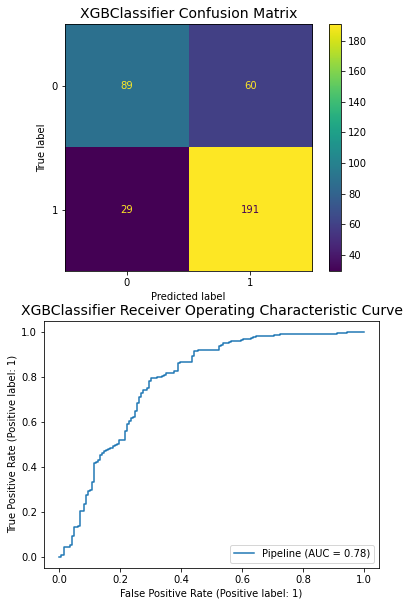

In [16]:
pipe_xgb = Pipeline([('xgb', XGBClassifier(random_state=729, learning_rate = 0.3, eval_metric = 'auc'))])
params_grid_xgb = {'xgb__nthread': [4],  # not a stat
                   'xgb__booster' : ['gbtree', 'gblinear', 'dart'],
                   'xgb__colsample_bylevel': [0.25],
                   'xgb__colsample_bynode': [0.25],
                   'xgb__colsample_bytree': [0.25],
                   #'xgb__learning_rate': np.linspace(0.1, 0.2, 6), # does not need
                   'xgb__max_depth': [6], # 7,8,10
                   'xgb__min_child_weight': [5], # 5,6,7,9
                   'xgb__missing': [-999],
                   'xgb__n_estimators': [250],
                   #'xgb__objective': ['reg:squarederror'],
                   'xgb__subsample': [0.10, 0.12] # 0.15, 0.2, 0.5, 0.7
                  }
xgb_clf = GridSearchCV(pipe_xgb, params_grid_xgb, n_jobs=-1,
                  cv=StratifiedKFold(n_splits=3, shuffle=True), 
                  scoring='f1_weighted',
                  verbose=2, refit=True)
xgb_clf.fit(X_train, y_train)
print(xgb_clf.best_params_)
best_xgb_clf = xgb_clf.best_estimator_
model_stats(X_train_df.columns, best_xgb_clf, 'XGBClassifier', X_test, y_test, True)